In [409]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import numpy as np
from scipy.signal import argrelmin
%matplotlib inline
import pandas as pd
import os

In [160]:
directory = '/home/nefta/thesis/results/wg3_2/supercurrent/use/'
#directory = '/home/nefta/thesis/results/hb/supercurrent/vsg=0.0-20171114-11:38:40/'
#W = 918 
#L = 204
# w , l = a * np.shape(scattering_regsion)
W = 360
L = 100

In [161]:
vsg_values = [float(x[4:-18]) for x in list(os.walk(directory))[0][1]]
vsg_dirs = dict(zip(vsg_values, list(os.walk(directory))[0][1]))

In [239]:
def flip_minima(abs_values, real_values, minima_order):
    main_peak = np.argmax(abs_values) # index of main peak
    left_min = [0]
    right_min = [main_peak]
    print(argrelmin(abs_values, order=20)[0])
    
    for loc_min in argrelmin(abs_values, order=minima_order)[0]:
    #for loc_min in[  3, 334, 389, 610, 665, 996]:#[  3, 157, 334, 389, 610, 665, 842, 996]
        if loc_min < main_peak:
            left_min.append(loc_min)
        else: right_min.append(loc_min)
    left_min.append(main_peak)
    right_min.append(len(abs_values))
    left_min_rev = list(reversed(left_min))
    
    #print(left_min, right_min, left_min_rev)
    osc = []
    n = len(left_min)
    for i in range(n - 1):
        #print(n-i - 1, n-i-2)
        for index in range(left_min_rev[n  - i - 1], left_min_rev[n - i - 2]):
            #osc.append((-1)**(i+1) * abs(real_values[index]))
            osc.append((-1)**(n - i) * abs(real_values[index]))
    for i in range(n - 1):
        #print(i, i+1)
        for index in range(right_min[i], right_min[i+1]):
            osc.append((-1)**i * abs(real_values[index]))
    return(argrelmin(abs_values, order=minima_order), osc)

In [240]:
def transform_to_density(b_values, real, imag, y_values):
    omega = 2 * np.pi / W
    
    phi_values = b_values * W * L 
    dPhi = phi_values[1] - phi_values[0]
    maxPhi = phi_values[-1]
    Jy_values = []
    for y in y_values:
        Jy_real = 0
        Jy_imag = 0
        for k, phi in list(enumerate(phi_values)):
            Ic_real = real[k] #Fourier coefficient
            Ic_imag = imag[k]
            Jy_real += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_real * np.cos(omega * phi * y) - Ic_imag * np.sin(omega * phi * y)) * dPhi
            Jy_imag += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_imag * np.cos(omega * phi * y) + Ic_real * np.sin(omega * phi * y)) * dPhi
        Jy_abs = np.sqrt(Jy_real**2 + Jy_imag**2)
        Jy_values.append(Jy_abs)
    print(len(Jy_values))
    return(Jy_values)

In [301]:
vsg_val = -0.95

In [302]:
dirname = directory + vsg_dirs[vsg_val] + '/'
absvalues, realvalues, imagvalues = pd.read_csv(dirname + 'data.csv', header=None).values.T

In [303]:
minima, realpart_flipped = flip_minima(absvalues, realvalues, 15)

[]


In [304]:
minima

(array([], dtype=int64),)

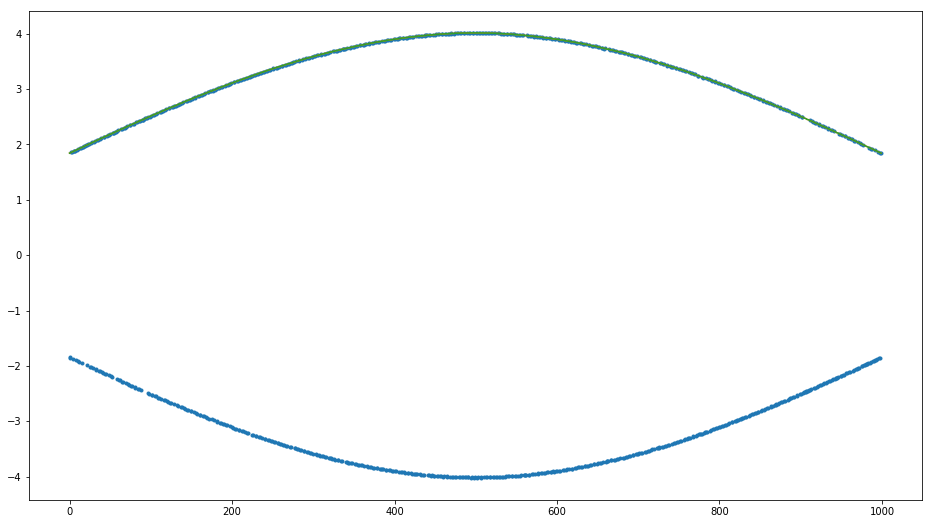

In [305]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(realvalues, linestyle='None', marker='.')
ax.plot(realpart_flipped),
ax.plot(abs(realvalues))

In [448]:
maxB = 0.00015
nb_points = 400
bvalues = np.linspace(-maxB, maxB, nb_points)
#yvalues = np.linspace(-1.5*W, 1.5*W, 500)
yvalues = np.linspace(-1.5*W, 1.5*W, 500)

#x = transform_to_density(bvalues, abs(realvalues), imagvalues, yvalues)

#fig, ax = plt.subplots()
#ax.plot(x)

#pd.DataFrame(x).to_csv(dirname+'fourier-data.csv', index=False)

In [442]:
fourier_dir = '/home/nefta/thesis/results/wg3_2/supercurrent/rough/fourier/'
#test_dir = '/home/nefta/thesis/results/wg3_2/supercurrent/use/fourier/vsg=-0.2-20171105-13:54:56/'

In [444]:
depth_values = [float(x[13:-26]) for x in list(os.walk(fourier_dir))[0][1]]
depth_dirs = dict(zip(depth_values, list(os.walk(fourier_dir))[0][1]))

In [445]:
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

In [446]:
pd.read_csv(fourier_dir + depth_dirs[5] + '/data.csv', delimiter=' ', header=None)

0         1             2
0    1.787551 -1.787551  8.827033e-17
1    1.852537 -1.852537 -1.838645e-16
2    1.876368 -1.876368 -8.233443e-17
3    1.885817 -1.885817 -8.554356e-17
4    2.027303  2.027303 -2.296598e-16
5    2.189371  2.189371 -1.111090e-16
6    2.388684  2.388684  1.299329e-16
7    2.569044  2.569044  7.296906e-17
8    2.690636  2.690636 -1.371762e-17
9    2.776865  2.776865  2.397645e-16
10   2.880362  2.880362  3.337821e-17
11   2.856064  2.856064  3.581797e-17
12   2.822674  2.822674 -2.116547e-16
13   2.754755  2.754755 -2.245010e-16
14   2.583240  2.583240 -2.598459e-16
15   2.456662  2.456662 -5.556554e-17
16   2.306012  2.306012 -1.464281e-16
17   2.280895  2.280895 -4.919077e-17
18   2.198803  2.198803  1.857557e-16
19   2.087556  2.087556  3.168881e-16
20   2.003516  2.003516  1.104910e-16
21   1.797914  1.797914 -9.724757e-17
22   1.710104  1.710104 -4.149705e-16
23   1.474783  1.474783 -3.527109e-16
24   1.364435  1.364435  7.836047e-17
25   1.139673 -1.139673  9.797799e-17
26   1.027975 -1.027975  1.341403e-16
27   0.824919 -0.824919 -2.947813e-17
28   0.671062  0.671062  6.018566e-18
29   0.630837 -0.630837  1.251699e-16
..        ...       ...           ...
370  0.630837  0.630837 -1.779414e-16
371  0.671062 -0.671062  6.115616e-17
372  0.824919  0.824919  1.042966e-16
373  1.027975  1.027975 -2.770549e-16
374  1.139673  1.139673  1.634863e-16
375  1.364435 -1.364435 -1.071042e-16
376  1.474783 -1.474783  8.793038e-17
377  1.710104 -1.710104 -2.256378e-16
378  1.797914 -1.797914 -4.476839e-16
379  2.003516 -2.003516  3.293998e-17
380  2.087556 -2.087556  1.961555e-17
381  2.198803 -2.198803  1.241715e-17
382  2.280895 -2.280895 -6.684103e-17
383  2.306012 -2.306012  4.959462e-17
384  2.456662 -2.456662  9.470501e-17
385  2.583240 -2.583240 -5.251501e-17
386  2.754755 -2.754755 -2.402143e-16
387  2.822674 -2.822674 -7.673071e-17
388  2.856064 -2.856064 -7.435540e-18
389  2.880362 -2.880362 -1.421195e-16
390  2.776865 -2.776865 -5.500973e-17
391  2.690636 -2.690636 -2.820736e-16
392  2.569044 -2.569044  1.371453e-16
393  2.388684 -2.388684  1.341948e-16
394  2.189371 -2.189371  1.968953e-17
395  2.027303 -2.027303 -1.753536e-16
396  1.885817  1.885817 -7.305926e-17
397  1.876368  1.876368  1.068697e-16
398  1.852537  1.852537  1.817776e-17
399  1.787551  1.787551 -1.576973e-16

[400 rows x 3 columns]

ValueError: x and y must have same first dimension, but have shapes (400,) and (398,)

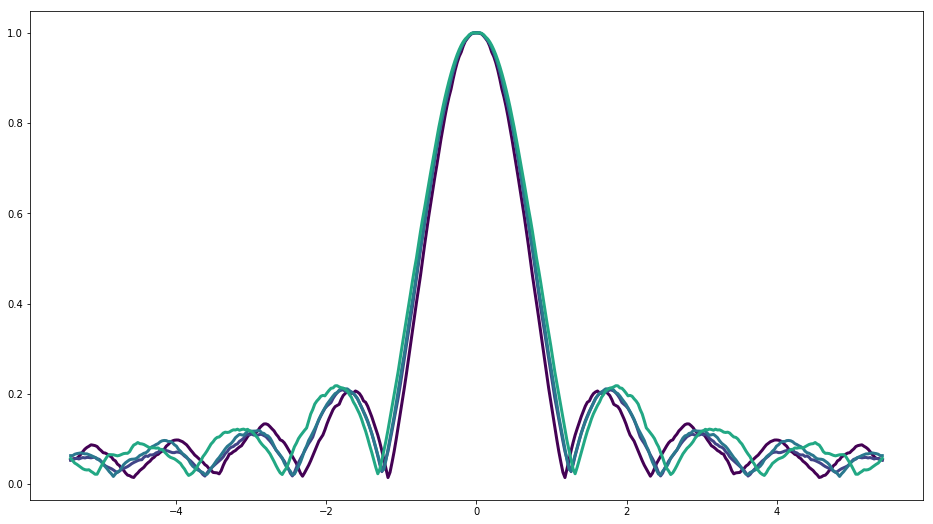

In [451]:
ticklabelsize = 20
fontlabelsize = 24
fig, ax = plt.subplots(figsize=(16, 9))
#vsg_vals = [ -0.3, -0.4, -0.42, -0.45]
colordelta = round(cmap.N / len(depth_values))
for index, value in enumerate(depth_values):
    data = pd.read_csv(fourier_dir +  depth_dirs[value] + '/data.csv',
                        delimiter=' ', header=None,)[0].values
    iczero = np.amax(data)
    ax.plot(bvalues*W*L, data/ iczero, label=r'$\varphi_{{SG}}={}$'.format(value),
            color=cmap(index*colordelta), linewidth=3)

ax.legend(prop={'size': 18})
#ax.xaxis.set_ticks([-W/2, W/2])
#ax.xaxis.set_ticklabels(['-W/2', '+W/2'])
ax.yaxis.set_ticks([0, 0.5, 1])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_ylabel('J(y)',fontsize=fontlabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)

fig.savefig('waveguide-ic.eps')
#for fdir in list(os.walk(fourier_dir))[0][1]:
#    data = pd.read_csv(fourier_dir + fdir + '/fourier-data.csv', delimiter=' ', header=None)
#    plt.plot(data)
#    plt.show()

ValueError: x and y must have same first dimension, but have shapes (500,) and (10,)

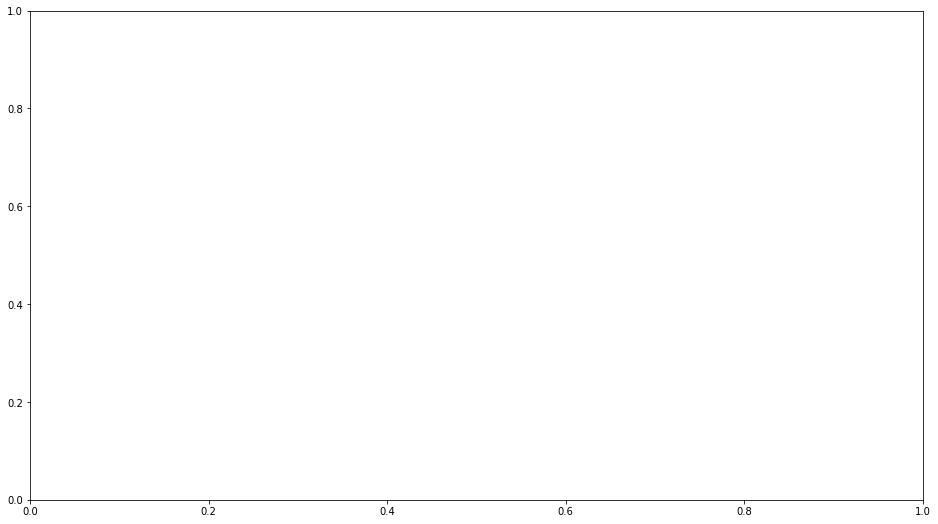

In [441]:
ticklabelsize = 20
fontlabelsize = 24
fig, ax = plt.subplots(figsize=(16, 9))
#vsg_vals = [ -0.3, -0.4, -0.42, -0.45]
colordelta = round(cmap.N / len(depth_values))
for index, value in enumerate(depth_values):
    data = pd.read_csv(fourier_dir +  depth_dirs[value] + '/data.csv',
                        delimiter=' ', header=None,)[0].values
    ax.plot(yvalues, data, label=r'$\varphi_{{SG}}={}$'.format(value), 
            color=cmap(index*colordelta), linewidth=3)

ax.legend(prop={'size': 18})
ax.xaxis.set_ticks([-W/2, W/2])
ax.xaxis.set_ticklabels(['-W/2', '+W/2'])
ax.yaxis.set_ticks([0, 10, 20, 30])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_ylabel('J(y)',fontsize=fontlabelsize)
ax.set_xlabel('y', fontsize=fontlabelsize)

fig.savefig('waveguide-jy.eps')

#for fdir in list(os.walk(fourier_dir))[0][1]:
#    data = pd.read_csv(fourier_dir + fdir + '/fourier-data.csv', delimiter=' ', header=None)
#    plt.plot(data)
#    plt.show()